<a href="https://colab.research.google.com/github/AkanshaRawat01/Plant-Disease-Detection/blob/main/InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [20]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [21]:
from google.colab import drive

In [22]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/tomato/train'
valid_path = '/content/drive/MyDrive/tomato/val'

In [23]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [24]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [25]:
 # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/tomato/train/*')

In [26]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [27]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [28]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [29]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [30]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [31]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/tomato/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 10021 images belonging to 10 classes.


In [32]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/tomato/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1000 images belonging to 10 classes.


In [33]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-33-2d02736eff38>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
314/314 [==============================] - 162s 500ms/step - loss: 3.3384 - accuracy: 0.6419 - val_loss: 3.6414 - val_accuracy: 0.6430
Epoch 2/20
314/314 [==============================] - 153s 487ms/step - loss: 2.2206 - accuracy: 0.7587 - val_loss: 2.8927 - val_accuracy: 0.7300
Epoch 3/20
314/314 [==============================] - 151s 481ms/step - loss: 1.9351 - accuracy: 0.8008 - val_loss: 2.1589 - val_accuracy: 0.7960
Epoch 4/20
314/314 [==============================] - 151s 481ms/step - loss: 1.7928 - accuracy: 0.8215 - val_loss: 3.4934 - val_accuracy: 0.7550
Epoch 5/20
314/314 [==============================] - 151s 482ms/step - loss: 1.6094 - accuracy: 0.8463 - val_loss: 2.5352 - val_accuracy: 0.7760
Epoch 6/20
314/314 [==============================] - 151s 480ms/step - loss: 1.5693 - accuracy: 0.8566 - val_loss: 3.7338 - val_accuracy: 0.7780
Epoch 7/20
314/314 [==============================] - 149s 475ms/step - loss: 1.6224 - accuracy: 0.8548 - val_loss: 3.7737 -

In [34]:
import matplotlib.pyplot as plt

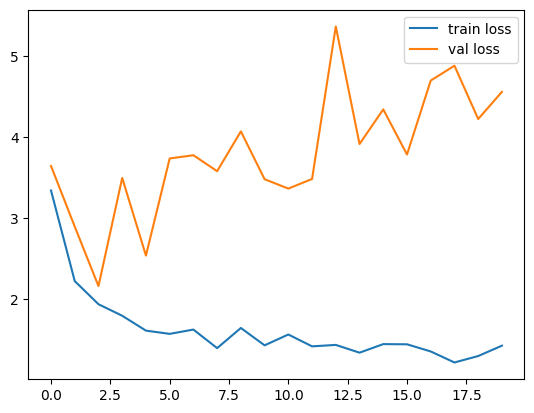

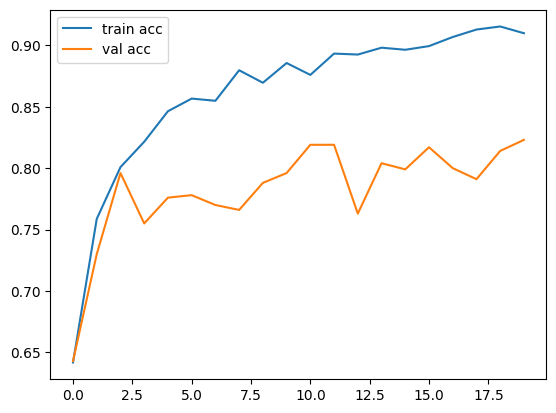

<Figure size 640x480 with 0 Axes>

In [35]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [36]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/tomato/Inception.h5')